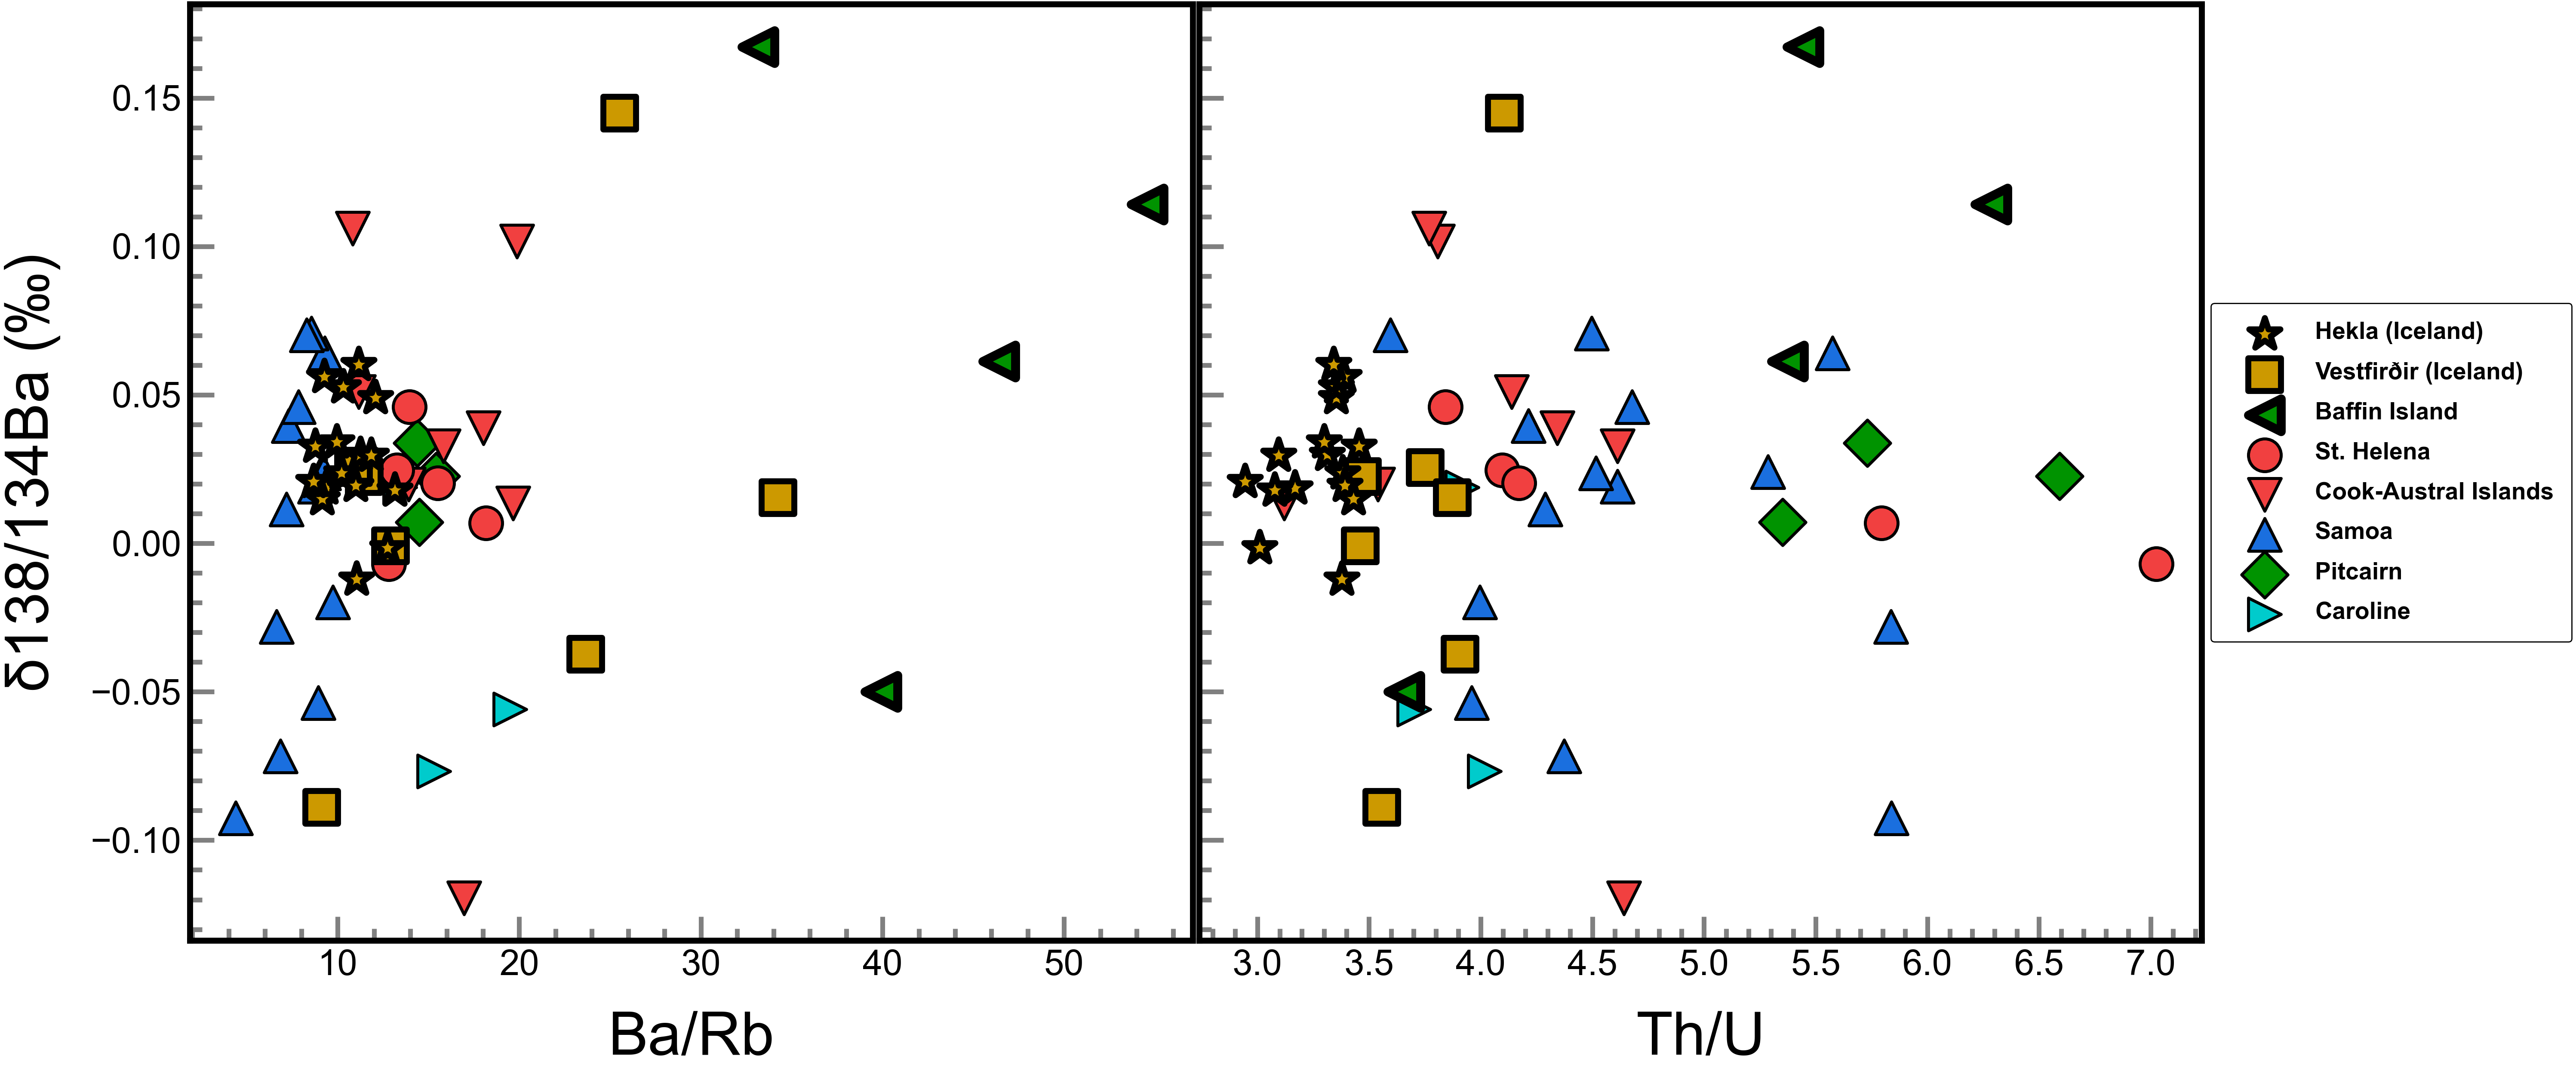

IndexError: list index out of range

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Set the font to Arial for all elements in the plot
plt.rcParams['font.family'] = 'Arial'

# Read the Excel spreadsheet
df = pd.read_excel('Pyrate data.xlsx')

# Extract element names and concentrations
sample_names = df.iloc[:, 0]
element_names = df.columns[2:]
concentrations = df.iloc[:, 2:]

Element_list_Y = ['d138/134Ba ']
Element_list_X = ['Ba/Rb', 'Th/U']


# Create a list of dictionaries for each sample group
sample_groups = [
    {
        'name': 'Hekla ',
        'label': 'Hekla (Iceland)',
        'year': 'this study',
        'marker_style': '*',
        'face_color': '#CC9900',
        'edge_color': 'black',
        'symbol_size': 3000,
        'linewidth': 10,
        'zorder': 8,
        'alpha': 1.0
    },
    {
        'name': 'Vestfirðir ',
        'label': 'Vestfirðir (Iceland)',
        'year': 'this study',
        'marker_style': 's',
        'face_color': '#CC9900',
        'edge_color': 'black',
        'symbol_size': 3000,
        'linewidth': 10,
        'zorder': 7,
        'alpha': 1.0
    },
    {
        'name': 'Baffin Island',
        'label': 'Baffin Island',
        'year': 'this study',
        'marker_style': '<',
        'face_color': '#009300',
        'edge_color': 'black',
        'symbol_size': 3000,
        'linewidth': 15,
        'zorder': 6,
        'alpha': 1.0
    },
    {
        'name': 'St. Helena',
        'label': 'St. Helena',
        'year': 'this study',
        'marker_style': 'o',
        'face_color': '#F14040',
        'edge_color': 'k',
        'symbol_size': 3000,
        'linewidth': 5,
        'zorder': 5,
        'alpha': 1.0
    },
    {
        'name': 'Cook-Austral Islands',
        'label': 'Cook-Austral Islands',
        'year': 'this study',
        'marker_style': 'v',
        'face_color': '#F14040',
        'edge_color': 'k',
        'symbol_size': 3000,
        'linewidth': 5,
        'zorder': 4,
        'alpha': 1
    },
    {
        'name': 'Samoa',
        'label': 'Samoa',
        'year': 'this study',
        'marker_style': '^',
        'face_color': '#1A6FDF',
        'edge_color': 'k',
        'symbol_size': 3000,
        'linewidth': 5,
        'zorder': 3,
        'alpha': 1.0
    },
    {
        'name': 'Pitcairn',
        'label': 'Pitcairn',
        'year': 'this study',
        'marker_style': 'D',
        'face_color': '#009300',
        'edge_color': 'k',
        'symbol_size': 3000,
        'linewidth': 5,
        'zorder': 2,
        'alpha': 1
    },
    {
        'name': 'Caroline',
        'label': 'Caroline',
        'year': 'this study',
        'marker_style': '>',
        'face_color': '#00CBCC',
        'edge_color': 'k',
        'symbol_size': 3000,
        'linewidth': 5,
        'zorder': 1,
        'alpha': 1.0
    },
]

# Define function to create plot
def create_plot(ax, X_data, Y_data, sample_groups, element_name, is_ax2=False):
    legend_handles = []
    legend_labels = []

    # Separate the data based on sample groups
    for group in sample_groups:
        group_name = group['name']
        group_label = group['label']
        year = group['year']
        marker_style = group['marker_style']
        face_color = group['face_color']
        edge_color = group['edge_color']
        symbol_size = group['symbol_size']
        linewidth = group['linewidth']
        zorder = group['zorder']
        alpha = group['alpha']

        for i, sample_name in enumerate(sample_names.astype(str)):
            if group_name in sample_name:
                try:
                    if np.any(X_data[i] > 0) and not np.ma.is_masked(X_data[i]):
                        X_value = X_data[i]
                        Y_value = Y_data[i]

                        # Plot the data for the current sample
                        sc = ax.scatter(x=X_value, y=Y_value, s=symbol_size,
                                        label=f'{group_label}',
                                        marker=marker_style,
                                        facecolor=face_color,
                                        edgecolor=edge_color, linewidths=linewidth, zorder=zorder, alpha=alpha)

                        # Add the handle and label to the legend lists
                        if ax == ax2 and f'{group_label}' not in legend_labels:
                            legend_handles.append(sc)
                            legend_labels.append(f'{group_label}')
                except ValueError:
                    pass

    # Set labels and title
    ax.set_xlabel(f'{element_name}', fontsize=100, labelpad=50)  # Increase labelpad to adjust the spacing from the axis
    if not is_ax2:
        ax.set_ylabel("δ138/134Ba (‰)", fontsize=100, labelpad=50)  # Increase labelpad to adjust the spacing from the axis
    #plt.xlim(-1, 60)
    #plt.ylim(-0.1, 1.5)
    # Make tick marks larger
    ax.tick_params(axis='both', which='major', labelsize=60, length=40, width=8, color='gray', direction='in', pad=15)  # Increase font size and length of tick marks
    ax.tick_params(axis='both', which='minor', length=20, width=8, color='gray', direction='in', pad=15)
    ax.minorticks_on()

    # Create the legend with the unique marker styles (only for ax2)
    if ax == ax2 and legend_handles:  # Only create legend if there are handles and it's ax2
        legend = ax.legend(handles=legend_handles, labels=legend_labels, loc='center left', bbox_to_anchor=(1, 0.5),
                           prop={'size': 30}, fontsize=30, handlelength=4, labelspacing=1, fancybox=True, framealpha=1,
                           edgecolor='black', borderpad=1)

        for text in legend.get_texts():
            text.set_fontsize(40)  # Adjust the value as per your preference
            text.set_fontweight('bold')

        # Get the legend box and set the linewidth
        legend_box = legend.get_frame()
        legend_box.set_linewidth(2)

    # Set the linewidth of the figure edges
    ax.spines['top'].set_linewidth(10)
    ax.spines['bottom'].set_linewidth(10)
    ax.spines['left'].set_linewidth(10)
    ax.spines['right'].set_linewidth(10)


# Loop over each pair of elements in Element_list_X and Element_list_Y
for j in range(len(Element_list_X)):
    X_index = np.where(element_names == Element_list_X[j])[0]
    Y_index = np.where(element_names == Element_list_Y[j])[0]
    if len(X_index) == 0 or len(Y_index) == 0:
        print(f'Element not found in DataFrame: X_element={Element_list_X[j]}, Y_element={Element_list_Y[j]}')
        continue

    X_index = X_index[0]
    Y_index = Y_index[0]

    X_data = concentrations.iloc[:, X_index].values
    Y_data = concentrations.iloc[:, Y_index].values

    # Filter out non-numeric data from X_data and Y_data
    X_data = pd.to_numeric(X_data, errors='coerce')
    Y_data = pd.to_numeric(Y_data, errors='coerce')

    # Create masked arrays for X_concentration and Y_concentration
    X_concentration = np.ma.masked_invalid(X_data)
    Y_concentration = np.ma.masked_invalid(Y_data)

    # Create figure and axes
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(60, 25), sharey=True)

    # Adjust spacing between subplots
    plt.subplots_adjust(wspace=0)  # Adjust the value to reduce or increase the gap

    # Create plots on ax1 and ax2
    create_plot(ax1, X_concentration, Y_concentration, sample_groups, Element_list_X[j])
    
    # For ax2, plot with 'Th/U' as x-axis
    X_index_thu = np.where(element_names == 'Th/U')[0]
    if len(X_index_thu) == 0:
        print(f'Element not found in DataFrame: X_element=Th/U')
        continue
    
    X_index_thu = X_index_thu[0]
    X_data_thu = concentrations.iloc[:, X_index_thu].values
    X_data_thu = pd.to_numeric(X_data_thu, errors='coerce')
    X_concentration_thu = np.ma.masked_invalid(X_data_thu)
    
    create_plot(ax2, X_concentration_thu, Y_concentration, sample_groups, 'Th/U', is_ax2=True)

    # Save the plot as PNG files
    output_dir = 'pyrate plot'
    os.makedirs(output_dir, exist_ok=True)  # Create the directory if it doesn't exist

    output_filename_1 = f'{Element_list_Y[j]}-{Element_list_X[j]}.png'
    output_filename_1 = output_filename_1.replace('/', 'to').replace('*', '-star')

   

    plt.savefig(os.path.join(output_dir, output_filename_1), format='png', bbox_inches='tight')
   

    # Display the plot
    plt.tight_layout()
    plt.show()

print('Plot is ready')
